# Assignment # 3 : Simulate Monty Hall Problem.
## Data Science 350
In this assignment I am simulating the Monty Hall problem and in the process proving that **<span style="color:red" >"Switching" </span>** is a better strategy in this game.
- I am writing a simple function which captures the output of this game through multiple iterations.
- I am then creating a frequency table based on this output to prove that "Switching" is a better strategy.
- I am then analysing this output through a simple arithmetic function to show that "Switching" is a clear winner.
- Finally I have created a bar plot to visually portray winner.

## Function Description
In this function I am capturing the output of the output of the game in a data frame. Here I am using the sample function to pick any door for the prize and the player first choice. Monty then goes on to pick the door which does not have the prize.
If a player chooses to switch then he/she would be picking the third door.

In [24]:
rm(list=ls())
# Clear Console:
cat("\014")
# Function to simulate Monty Hall game.
monty <- function(N)
{
  doors <- c('A', 'B', 'C')
  df <- data.frame(play=character(),
                      stringsAsFactors=FALSE)
  for (i in 1:N)
  {
    prize <- sample(doors)[1] # Prize is behind this door.
    pick <- sample(doors)[1] # Player first picks this door
    open <- sample(doors[which(doors != pick & doors != prize)])[1] # Monty now opens the second door
    switch <- doors[which(doors != pick & doors != open)] # Player could now switch the door.
    if(pick==prize)
    {
      df[i,1]= "Stay"
    }
    if(switch==prize)
    {
      df[i,1]= "Switch"
    }
  }
  return(df)
}

## Call the function.
Here i am calling the function **monty** with **<span style="color:red">1000</span>** iterations to check the winning strategy.
- I am providing a frequency table to prove that "Switch" is a clear winner.
- I am then also using simple arithmetic to show these number in percentage.

In [25]:
N= 1000 # This simulation with 1000 iterations.
dists <- monty(N) # call the function
table(dists$play) # Create a frequency table
count <- table(dists) 
staycount <- count[1]# Get the count of stays
Switchcount <- count[2]# Get the count of switches.
cat(paste('Stay would win the prize by : ', (staycount/N)*100,'%\n'))
cat(paste('Switching would win the prize by : ',(Switchcount/N)*100,'%\n'))


  Stay Switch 
   332    668 

Stay would win the prize by :  33.2 %
Switching would win the prize by :  66.8 %


## Visualise the result.
I am now creating a bar plot to visually demonstrate that **<span style="color:red">"Switching"</span>** is a better strategy.

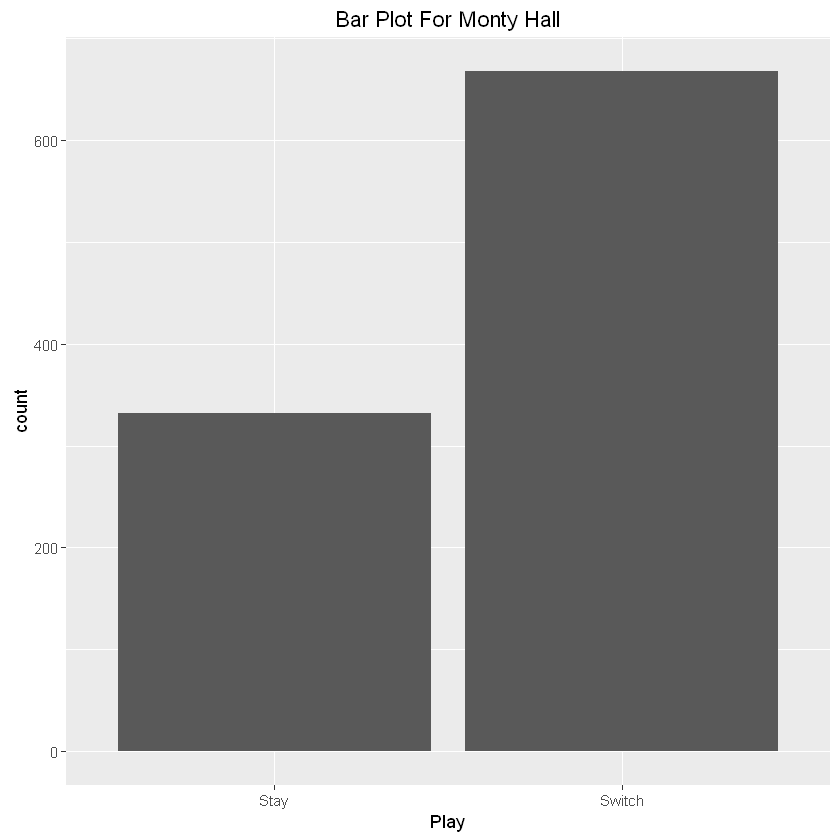

In [27]:
require(ggplot2)
# Create a bar plot to show the difference in 
ggplot(dists, aes(dists$play)) + ## Specify the data frame and columns. Note the + chain operator
  geom_bar()+
  xlab('Play') +  
  ggtitle('Bar Plot For Monty Hall')